In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pydicom
import numpy as np

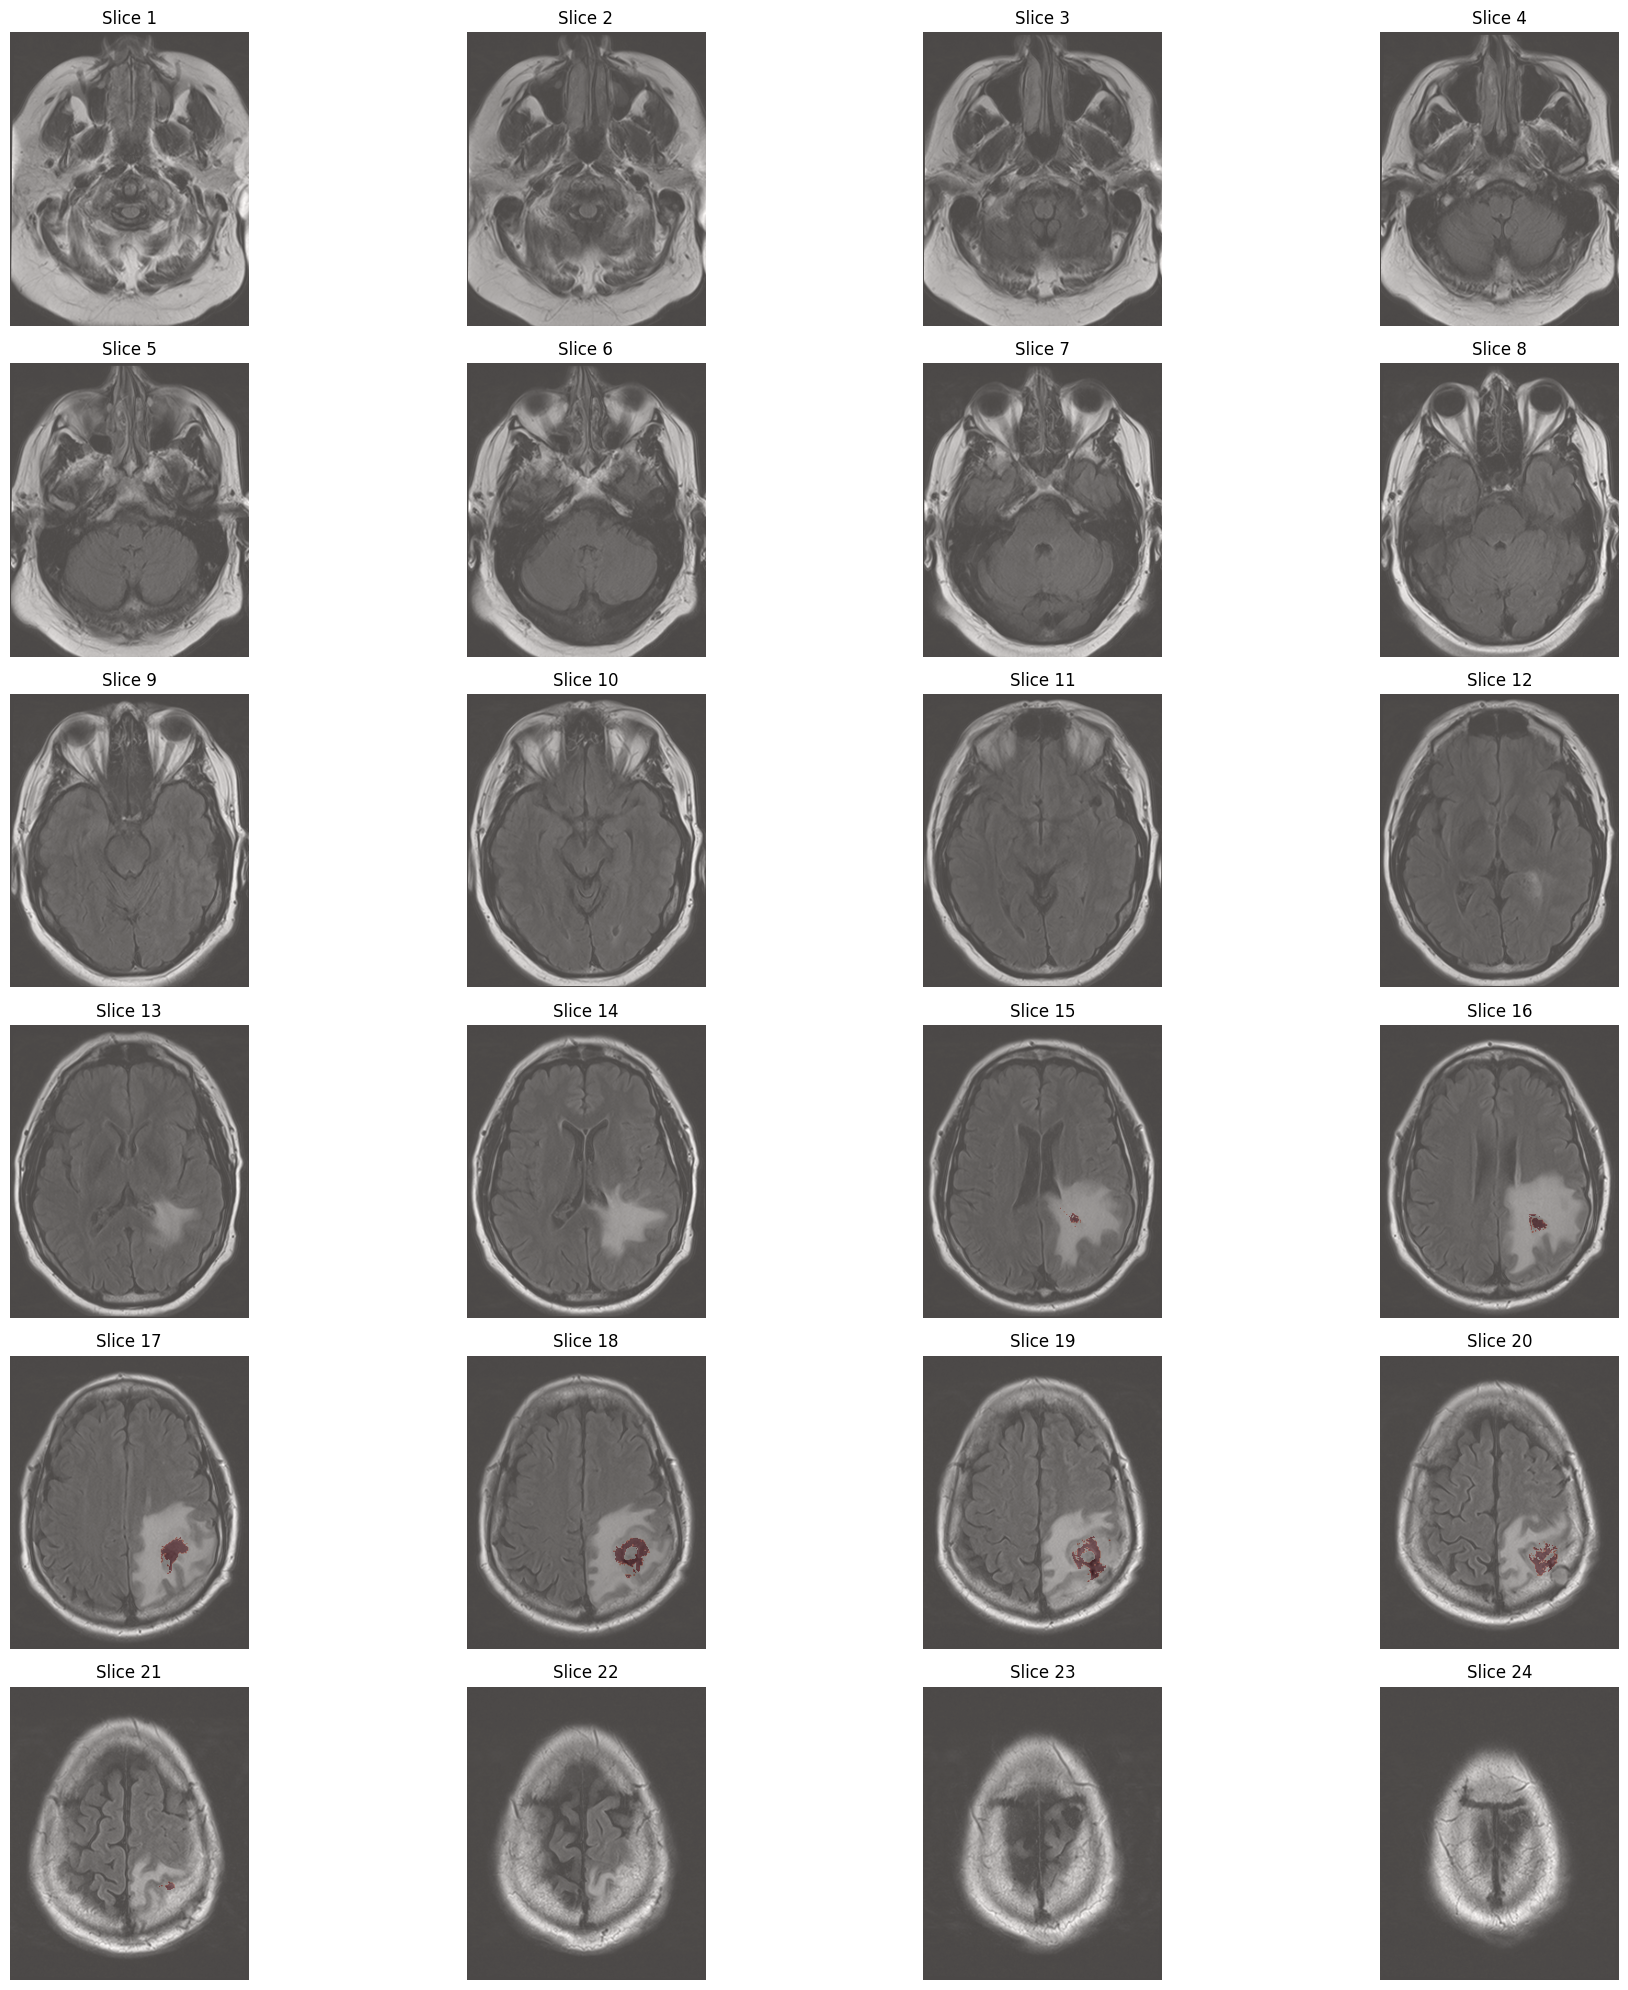

In [4]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# ===== CONFIG =====
BASE_PATH = "Tumor_Data/Brain-Tumor-Progression/PGBM-001/FH HEADBrain Protocols"
T1_DIR = os.path.join(BASE_PATH, "FLAIRreg")
MASK_DIR = os.path.join(BASE_PATH, "MaskTumor")

# ===== LIST FILES =====
t1_files = sorted([os.path.join(T1_DIR, f) for f in os.listdir(T1_DIR) if f.endswith(".dcm")])
mask_files = sorted([os.path.join(MASK_DIR, f) for f in os.listdir(MASK_DIR) if f.endswith(".dcm")])

# ===== LOAD ALL =====
def load_dicom(path):
    return pydicom.dcmread(path).pixel_array

t1_images = [load_dicom(f) for f in t1_files[:24]]   # first 20 slices
mask_images = [load_dicom(f) for f in mask_files[:24]]

# ===== PLOT =====
fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 4 rows × 5 cols = 20
axs = axs.flatten()

for i in range(24):
    axs[i].imshow(t1_images[i], cmap='gray')
    axs[i].imshow(mask_images[i], cmap='Reds', alpha=0.3)  # overlay mask
    axs[i].set_title(f"Slice {i+1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()